# Regularization - Elastic Net & Least Angle Regression

References:

https://machinelearningmastery.com/elastic-net-regression-in-python/

https://www.geeksforgeeks.org/implementation-of-lasso-ridge-and-elastic-net/

https://analyticsindiamag.com/hands-on-tutorial-on-elasticnet-regression/

https://www.geeksforgeeks.org/least-angle-regression-lars/#:~:text=Least%20Angle%20Regression%20(LARS)%20is,similar%20to%20forward%20stepwise%20regression.


### Contents:

1. <a href="#Introduction">Introduction</a>
2. <a href="#Elastic-Net-Regression">Elastic Net Regression</a>
3. <a href="#Least-Angle-Regression-(LAR)">Least Angle Regression (LAR)</a>
4. <a href="#Code-Elasti-Net-Regularization!">Code Elastic Net Regularization!</a>
5. <a href="#Code-for-Least-Angle-Regression-(LAR)">Code for Least Angle Regression (LAR)</a>

## Introduction

Linear regression is the standard algorithm for regression that assumes a linear relationship between inputs and the target variable. An extension to linear regression involves adding penalties to the loss function during training that encourage simpler models that have smaller coefficient values. These extensions are referred to as regularized linear regression or penalized linear regression.

*Elastic net* is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions.

*Least Angle Regression (LARS)* is an algorithm used in regression for high dimensional data (i.e., data with a large number of attributes). Least Angle Regression is somewhat similar to forward stepwise regression. 

## Elastic Net Regression

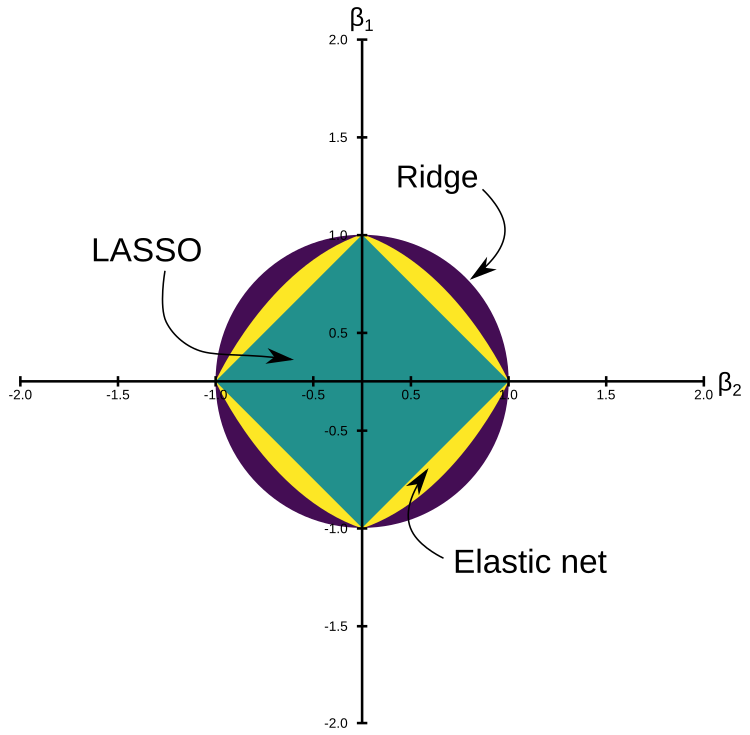

Elastic Net is a regularized regression model that combines l1 and l2 penalties, i.e., lasso and ridge regression. regularization helps in overfitting problems of the models.

Elastic Net first emerged as a result of critique on lasso, whose variable selection can be too dependent on data and thus unstable. The solution is to combine the penalties of ridge regression and lasso to get the best of both worlds. Elastic Net aims at minimizing the following loss function:

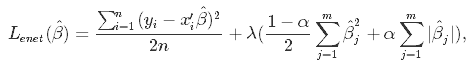

where α is the mixing parameter between ridge (α = 0) and lasso (α = 1).

With a single input variable, this relationship is a line, and with higher dimensions, this relationship can be thought of as a hyperplane that connects the input variables to the target variable. The coefficients of the model are found via an optimization process that seeks to minimize the sum squared error between the predictions (yhat) and the expected target values (y).

- loss = sum i=0 to n (y_i – yhat_i)^2

A problem with linear regression is that estimated coefficients of the model can become large, making the model sensitive to inputs and possibly unstable. This is particularly true for problems with few observations (samples) or more samples (n) than input predictors (p) or variables (so-called p >> n problems).

One approach to addressing the stability of regression models is to change the loss function to include additional costs for a model that has large coefficients. Linear regression models that use these modified loss functions during training are referred to collectively as penalized linear regression.

One popular penalty is to penalize a model based on the sum of the squared coefficient values. This is called an L2 penalty. An L2 penalty minimizes the size of all coefficients, although it prevents any coefficients from being removed from the model.

- l2_penalty = sum j=0 to p beta_j^2

Another popular penalty is to penalize a model based on the sum of the absolute coefficient values. This is called the L1 penalty. An L1 penalty minimizes the size of all coefficients and allows some coefficients to be minimized to the value zero, which removes the predictor from the model.

- l1_penalty = sum j=0 to p abs(beta_j)

Elastic net is a penalized linear regression model that includes both the L1 and L2 penalties during training.

Using the terminology from “The Elements of Statistical Learning,” a hyperparameter “alpha” is provided to assign how much weight is given to each of the L1 and L2 penalties. Alpha is a value between 0 and 1 and is used to weight the contribution of the L1 penalty and one minus the alpha value is used to weight the L2 penalty.

- elastic_net_penalty = (alpha * l1_penalty) + ((1 – alpha) * l2_penalty)

For example, an alpha of 0.5 would provide a 50 percent contribution of each penalty to the loss function. An alpha value of 0 gives all weight to the L2 penalty and a value of 1 gives all weight to the L1 penalty.

Another hyperparameter is provided called “lambda” that controls the weighting of the sum of both penalties to the loss function. A default value of 1.0 is used to use the fully weighted penalty; a value of 0 excludes the penalty. Very small values of lambada, such as 1e-3 or smaller, are common.

- elastic_net_loss = loss + (lambda * elastic_net_penalty)


## Least Angle Regression (LAR)

Least Angle Regression (LARS) is an algorithm used in regression for high dimensional data (i.e., data with a large number of attributes). Least Angle Regression is somewhat similar to forward stepwise regression. Since it is used with data that has lots of attributes, at each step, LARS finds the attribute which is most highly correlated to the target value. There may be more than one attribute that has the same correlation. In this scenario, LARS averages the attributes and proceeds in a direction that is at the same angle to the attributes. This is exactly why this algorithm is called Least Angle regression. Basically, LARS makes leaps in the most optimally calculated direction without overfitting the model. 

Algorithm: 

- Normalize all values to have zero mean and unit variance.
- Find a variable that is most highly correlated to the residual. Move the regression line in this direction until we reach another variable that has the same or higher correlation.

Note : Residual is the difference between the observed value and the predicted value. Variable, here implies an attribute. 

- When we have two variables that have the same correlation, move the regression line at an angle that is in between (i.e., least angle between the two variables).
- Continue this until all of our data is exhausted or until you think the model is big and ‘general’ enough.

Mathematically, LARS works as follows : 

- All coefficients, ‘B’ are set to 0.
- The predictor, xj is found that is most correlated to y.
- Increase the coefficient Bj in the direction that is most correlated with y and stop when you find some other predictor xk     the has equal or higher correlation than xj.
- Extend (Bj, Bk) in a direction that is equiangular (has the same angle) to both xj and xk.
- Continue and repeat until all predictors are in the model.

Advantages of using LARS: 
 
- Computationally as fast as forward selection but may sometimes be more accurate.
- Numerically very efficient when the number of features is much larger than the number of data instances.
- It can easily be modified to produce solutions for other estimators.

Disadvantages of using LARS: 

- LARS is highly sensitive to noise and can produce unpredictable results sometimes.

### Code Elastic Net Regularization!

In [1]:
#Importing the libraries!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\sahude7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

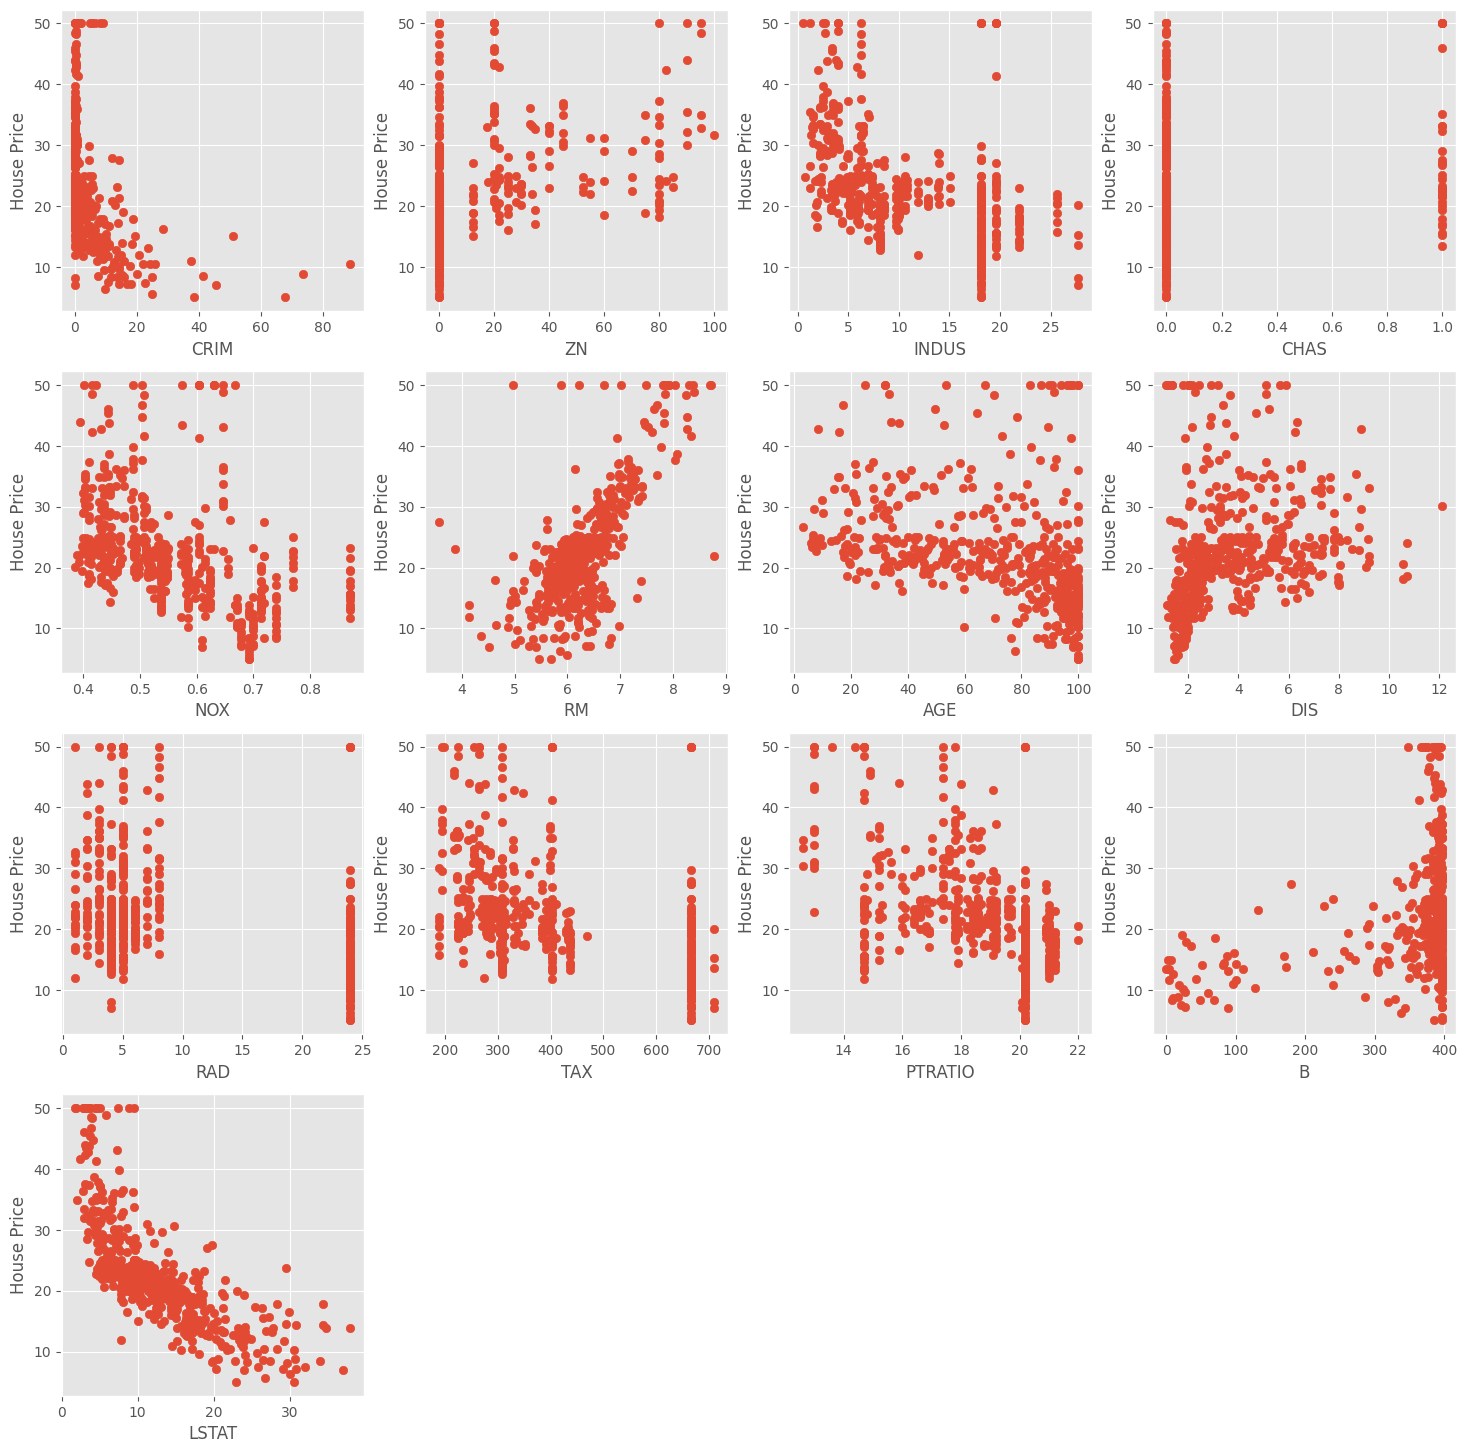

In [3]:
# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))
 
for index, feature_name in enumerate(boston_dataset.feature_names):
    ax = fig.add_subplot(4, 4, index + 1)
    ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
    ax.set_ylabel('House Price', size = 12)
    ax.set_xlabel(feature_name, size = 12)
 
plt.show()

In [4]:
# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)
 
# input
X = boston_pd.iloc[:, :-1]
 
#output
Y = boston_pd.iloc[:, -1]
 
print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [5]:
#Train test Split
x_train, x_test, y_train, y_test = train_test_split(
    boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
    test_size = 0.25)
 
print("Train data shape of X = % s and Y = % s : "%(
    x_train.shape, y_train.shape))
 
print("Test data shape of X = % s and Y = % s : "%(
    x_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


In [6]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)
 
# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)
 
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)
 
# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set :  42.376529050695225
    Columns  Coefficient Estimate
0      CRIM             -0.062129
1        ZN              0.038113
2     INDUS              0.010434
3      CHAS              1.741818
4       NOX            -15.199648
5        RM              5.343499
6       AGE             -0.011370
7       DIS             -1.333335
8       RAD              0.239764
9       TAX             -0.012604
10  PTRATIO             -0.885545
11        B              0.009921
12    LSTAT             -0.390062


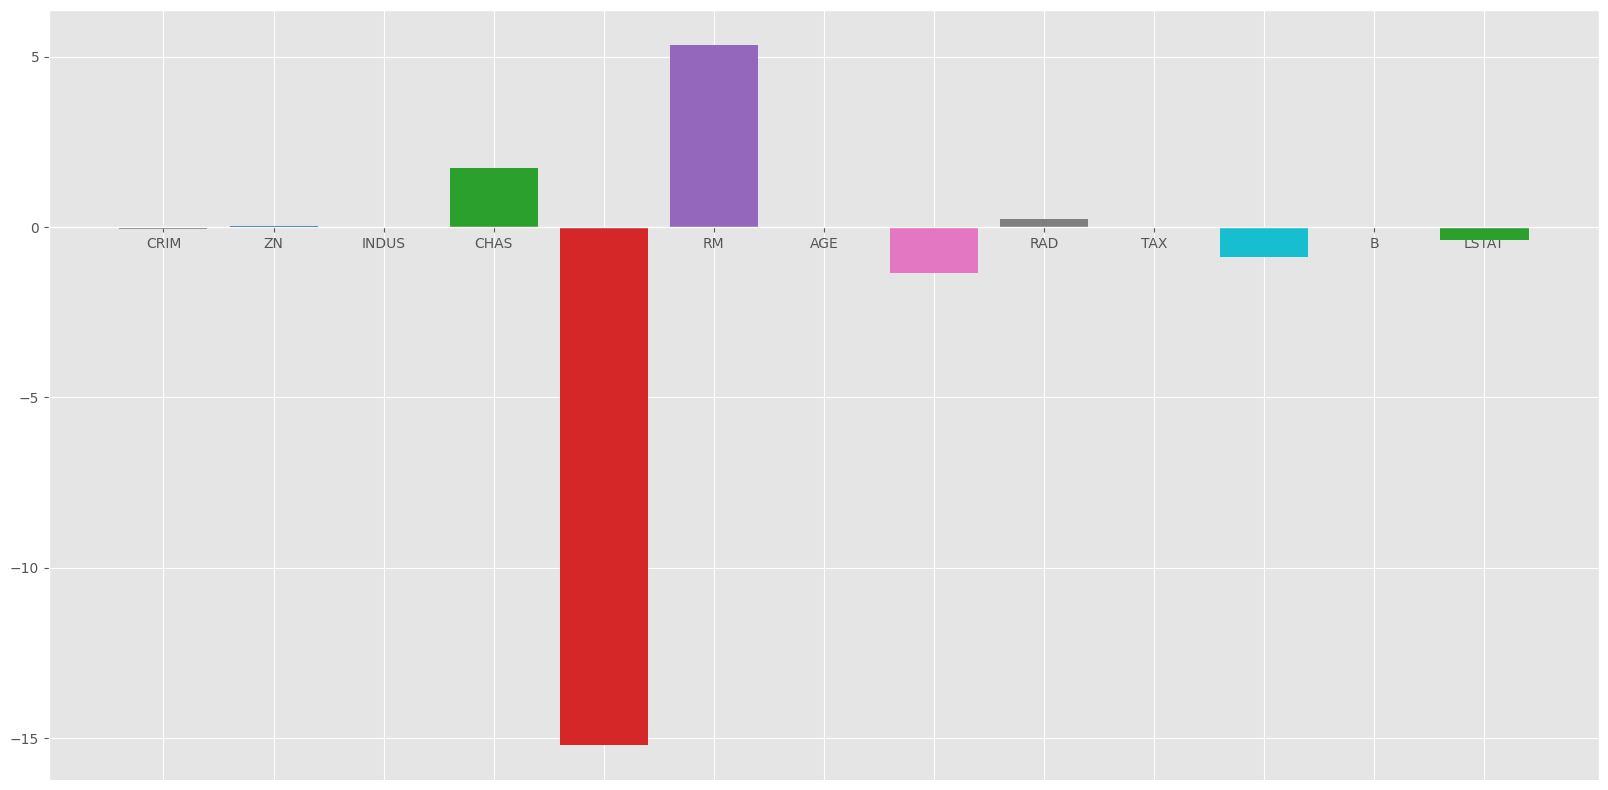

In [7]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
 
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 
ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Estimate'],
color = color)
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.show()

As we can observe that lots of the variables have an insignificant coefficient, these coefficients did not contribute to the model very much and need to regulate or even eliminate some of these variables. 

In [8]:
## Elastic Net regularization!

# import model
from sklearn.linear_model import ElasticNet
 
# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)
 
# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)
 
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 38.82326471702315


,Columns,Coefficient Estimate
0,CRIM,-0.043462
1,ZN,0.046978
2,INDUS,-0.051715
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.298133
6,AGE,0.020615
7,DIS,-0.750557
8,RAD,0.273943
9,TAX,-0.017565


Elastic Net is a combination of both of the Lasso and Ridge regularization. It contains both the L1 and L2 as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases. 

### Code for Least Angle Regression (LAR)

In [9]:
# Importing modules that are required
 
from sklearn.datasets import load_boston
from sklearn.linear_model import LassoLars
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [10]:
# Loading dataset
dataset = load_boston()
X = dataset.data
y = dataset.target

C:\Users\sahude7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

In [11]:
# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                     test_size = 0.15, random_state = 42)
 
# Creating and fitting the regressor
regressor = LassoLars(alpha = 0.1)
regressor.fit(X_train, y_train)
 
 
# Evaluating model
prediction = regressor.predict(X_test)
 
print(f"r2 Score of test set : {r2_score(y_test, prediction)}")

r2 Score of test set : 0.6815908068381827


C:\Users\sahude7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


[<a href="#Contents:">Back to Content</a>]

**THE END**

In [ ]:
#tesated:no errors